In [128]:
import pandas as pd

In [146]:
df = pd.read_csv("Brownlow Full Database.csv")

In [147]:
df.head()

,Unique_Game_ID,Year,Round,Game_ID,Home_Team,Home_Score,Away_Team,Away_Score,Player,Team,...,Behinds,Goal_Assists,Goal_Percentage,Time_On_Ground_Percentage,AFL_Fantasy_Points,Brownlow_Votes,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,1,2012,1,1,GWS,37,Sydney,100,Tomas Bugg,GWS,...,0,0,0.0,80.0,97,0.0,NaN,NaN,NaN,NaN
1,1,2012,1,1,GWS,37,Sydney,100,Jeremy Cameron,GWS,...,0,0,0.0,94.0,39,0.0,NaN,NaN,NaN,NaN
2,1,2012,1,1,GWS,37,Sydney,100,Stephen Coniglio,GWS,...,0,0,0.0,81.0,53,0.0,NaN,NaN,NaN,NaN
3,1,2012,1,1,GWS,37,Sydney,100,Chad Cornes,GWS,...,0,0,0.0,91.0,111,0.0,NaN,NaN,NaN,NaN
4,1,2012,1,1,GWS,37,Sydney,100,Phil Davis,GWS,...,0,1,0.0,93.0,62,0.0,NaN,NaN,NaN,NaN


In [148]:
def calculate_margin(row):
    if(row['Team'] == row['Home_Team']):
        return row['Home_Score'] - row['Away_Score']
    else:
        return row['Away_Score'] - row['Home_Score']
    
    
df = df.iloc[:, :-4]
df['Winning_Margin'] = df.apply(lambda x: calculate_margin(x), axis=1)

In [149]:
df.head()

,Unique_Game_ID,Year,Round,Game_ID,Home_Team,Home_Score,Away_Team,Away_Score,Player,Team,...,Bounces,Inside_50s,Goals,Behinds,Goal_Assists,Goal_Percentage,Time_On_Ground_Percentage,AFL_Fantasy_Points,Brownlow_Votes,Winning_Margin
0,1,2012,1,1,GWS,37,Sydney,100,Tomas Bugg,GWS,...,0,0,0,0,0,0.0,80.0,97,0.0,-63
1,1,2012,1,1,GWS,37,Sydney,100,Jeremy Cameron,GWS,...,0,0,0,0,0,0.0,94.0,39,0.0,-63
2,1,2012,1,1,GWS,37,Sydney,100,Stephen Coniglio,GWS,...,0,1,0,0,0,0.0,81.0,53,0.0,-63
3,1,2012,1,1,GWS,37,Sydney,100,Chad Cornes,GWS,...,0,1,0,0,0,0.0,91.0,111,0.0,-63
4,1,2012,1,1,GWS,37,Sydney,100,Phil Davis,GWS,...,0,1,0,0,1,0.0,93.0,62,0.0,-63


In [150]:
# Assign original datafram minus last 4 columns to override df variable
df = df.iloc[:, 10:]

In [151]:
df.head()

,Kicks,Handballs,Disposals,Contested_Possessions,Uncontested_Possessions,Disposal_Efficiency,Clangers,Marks,Contested_Marks,Marks_Inside_50,...,Bounces,Inside_50s,Goals,Behinds,Goal_Assists,Goal_Percentage,Time_On_Ground_Percentage,AFL_Fantasy_Points,Brownlow_Votes,Winning_Margin
0,14,13,27,0,0,74.1,3.0,5,0,0,...,0,0,0,0,0,0.0,80.0,97,0.0,-63
1,6,2,8,0,0,100.0,2.0,5,2,0,...,0,0,0,0,0,0.0,94.0,39,0.0,-63
2,6,11,17,0,0,82.4,1.0,3,1,0,...,0,1,0,0,0,0.0,81.0,53,0.0,-63
3,17,7,24,0,0,62.5,6.0,8,2,0,...,0,1,0,0,0,0.0,91.0,111,0.0,-63
4,12,5,17,0,0,64.7,4.0,5,0,1,...,0,1,0,0,1,0.0,93.0,62,0.0,-63


In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [153]:
X = df.drop([
    'Contested_Possessions', # values not recorded in 2012 data
    'Uncontested_Possessions', # values not recorded in 2012 data
    'Brownlow_Votes'
], axis=1)
y = df['Brownlow_Votes'].fillna(0)

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=37)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
confusion_matrix(y_test, pred)

array([[11299,     0,     6,    14],
       [  276,     0,     2,    14],
       [  249,     0,     8,    39],
       [  196,     2,    10,    91]])

Normalized confusion matrix
[[9.98e-01 0.00e+00 5.30e-04 1.24e-03]
 [9.45e-01 0.00e+00 6.85e-03 4.79e-02]
 [8.41e-01 0.00e+00 2.70e-02 1.32e-01]
 [6.56e-01 6.69e-03 3.34e-02 3.04e-01]]


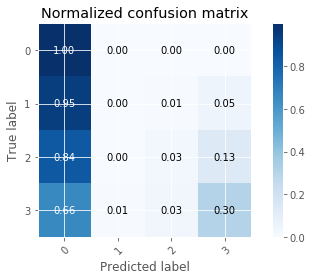

In [172]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, pred, classes=['0','1','2','3'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

The optimal number of neighbors is 37


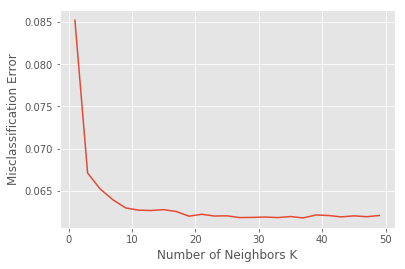

In [170]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [201]:
import random

def sample_no_votes(row):
    if row['Brownlow_Votes'] > 0:
        return True
    else:
        return True if random.randint(0, 100) < 10 else False

    
    
df['keep'] = df.apply(lambda x: sample_no_votes(x), axis=1)

In [202]:
df_balanced = df.drop(df[df.keep == False].index)

In [203]:
df_balanced.head()

,Kicks,Handballs,Disposals,Contested_Possessions,Uncontested_Possessions,Disposal_Efficiency,Clangers,Marks,Contested_Marks,Marks_Inside_50,...,Inside_50s,Goals,Behinds,Goal_Assists,Goal_Percentage,Time_On_Ground_Percentage,AFL_Fantasy_Points,Brownlow_Votes,Winning_Margin,keep
1,6,2,8,0,0,100.0,2.0,5,2,0,...,0,0,0,0,0.0,94.0,39,0.0,-63,True
2,6,11,17,0,0,82.4,1.0,3,1,0,...,1,0,0,0,0.0,81.0,53,0.0,-63,True
5,1,2,3,0,0,100.0,0.0,1,1,0,...,0,0,0,0,0.0,82.0,22,0.0,-63,True
24,4,0,4,0,0,50.0,3.0,2,0,0,...,1,0,0,0,0.0,20.0,19,0.0,63,True
26,13,8,21,0,0,71.4,3.0,6,1,1,...,7,0,1,1,0.0,92.0,84,0.0,63,True


Normalized confusion matrix
[[0.96 0.02 0.01 0.01]
 [0.46 0.17 0.16 0.21]
 [0.31 0.18 0.22 0.29]
 [0.14 0.12 0.18 0.56]]


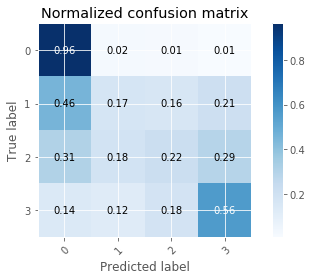

In [227]:
X = df_balanced.drop([
    'Contested_Possessions', # values not recorded in 2012 data
    'Uncontested_Possessions', # values not recorded in 2012 data
    'Brownlow_Votes',
    'keep'
], axis=1)
y = df_balanced['Brownlow_Votes'].fillna(0)


X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=127)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)


plot_confusion_matrix(y_test, pred, classes=['0','1','2','3'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

The optimal number of neighbors is 127


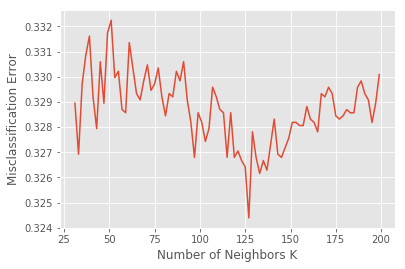

In [220]:
# creating odd list of K for KNN
neighbors = list(range(31, 200, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [237]:
df2019 = pd.read_csv("2019 Brownlow Match Data.csv")
df2019 = df2019.iloc[:, :-4]
df2019['Winning_Margin'] = df2019.apply(lambda x: calculate_margin(x), axis=1)
df2019 = df2019.iloc[:, 10:]
df2019.shape

(8722, 28)

In [239]:
X = df2019.drop([
    'Contested_Possessions', # values not recorded in 2012 data
    'Uncontested_Possessions' # values not recorded in 2012 data
], axis=1)

X.shape

(8722, 26)

In [240]:
pred = knn.predict(X.values)

In [241]:
pred.shape

(8722,)

In [242]:
df2019 = pd.read_csv("2019 Brownlow Match Data.csv")

In [243]:
df2019['Predicted_Votes'] = pred.tolist()

In [245]:
df2019.head(50)

,Unique_Game_ID,Year,Round,game_id,Home_Team,Home_Score,Away_Team,Away_Score,player_name,Team,...,Behinds,Goal_Assists,Goal_Percentage,Time_On_Ground_Percentage,AFL_Fantasy_Points,Champion_Data_Rating,Tackles_50,Metres_Gained,Score_Involvements,Predicted_Votes
0,1387,2019,1,1,CARL,64,RICH,97,Marc Murphy,CARL,...,0,0,100,87,97,14.9,0,530,7,0.0
1,1387,2019,1,1,CARL,64,RICH,97,Sam Petrevski-Seton,CARL,...,0,0,0,85,81,7.1,0,282,0,0.0
2,1387,2019,1,1,CARL,64,RICH,97,Nic Newman,CARL,...,0,0,100,84,115,15.9,0,584,4,1.0
3,1387,2019,1,1,CARL,64,RICH,97,Liam Jones,CARL,...,0,0,0,97,49,11.5,0,20,1,0.0
4,1387,2019,1,1,CARL,64,RICH,97,Andrew Phillips,CARL,...,0,0,0,79,83,9.7,2,163,2,0.0
5,1387,2019,1,1,CARL,64,RICH,97,Michael Gibbons,CARL,...,1,0,0,71,43,3.9,0,168,5,0.0
6,1387,2019,1,1,CARL,64,RICH,97,Patrick Cripps,CARL,...,0,0,0,89,101,26.2,0,263,5,0.0
7,1387,2019,1,1,CARL,64,RICH,97,Jarrod Garlett,CARL,...,0,0,0,68,51,6.6,0,202,2,0.0
8,1387,2019,1,1,CARL,64,RICH,97,David Cuningham,CARL,...,0,1,0,79,83,4.7,2,328,6,0.0
9,1387,2019,1,1,CARL,64,RICH,97,Paddy Dow,CARL,...,1,0,0,76,66,5.4,0,195,5,0.0


In [247]:
# Group by player and sort form high votes to low
results = pd.DataFrame(data = df2019.groupby(['Year','player_name','Team'])['Predicted_Votes'].sum())
results = results.reset_index()
results = results.sort_values('Predicted_Votes', ascending=False);

# Display the top 20 predicted vote getters for 2016
results.head(n=20)

,Year,player_name,Team,Predicted_Votes
242,2019,Jack Macrae,WB,34.0
9,2019,Adam Treloar,COLL,33.0
348,2019,Josh Dunkley,WB,30.0
494,2019,Patrick Dangerfield,GEEL,29.0
81,2019,Brodie Grundy,COLL,28.0
588,2019,Tim Taranto,GWS,27.0
23,2019,Andrew Gaff,WCE,26.0
432,2019,Matt Crouch,ADEL,25.0
420,2019,Marcus Bontempelli,WB,25.0
60,2019,Brad Crouch,ADEL,24.0


In [249]:
df_all = pd.read_csv("Brownlow Full Database.csv")
df_all = df_all.iloc[:, :-4]
df_all['Winning_Margin'] = df_all.apply(lambda x: calculate_margin(x), axis=1)
df_all = df_all.iloc[:, 10:]

In [254]:
X = df_all.drop([
    'Contested_Possessions', # values not recorded in 2012 data
    'Uncontested_Possessions', # values not recorded in 2012 data
    'Brownlow_Votes'
], axis=1)

In [256]:
pred = knn.predict(X.values)

In [264]:
df_all = pd.read_csv("Brownlow Full Database.csv")
df_all['Predicted_Votes'] = pred.tolist()

In [259]:
results = pd.DataFrame(data = df_all.groupby(['Year','Player','Team'])['Predicted_Votes'].sum())
results = results.reset_index()
results = results.sort_values('Predicted_Votes', ascending=False);

In [266]:
results_2018 = df_all[df_all['Year'] == 2018]

results_2018 = pd.DataFrame(data = results_2018.groupby(['Year','Player','Team'])['Predicted_Votes'].sum())
results_2018 = results_2018.reset_index()
results_2018 = results_2018.sort_values('Predicted_Votes', ascending=False);

results_2018.head(n=20)

,Year,Player,Team,Predicted_Votes
623,2018,Tom Mitchell,HAW,41.0
85,2018,Brodie Grundy,COLL,33.0
655,2018,Zach Merrett,ESS,31.0
119,2018,Clayton Oliver,MELB,28.0
29,2018,Andrew Gaff,WCE,27.0
240,2018,Jack Macrae,WB,27.0
203,2018,Gary Ablett,GEEL,26.0
33,2018,Angus Brayshaw,MELB,25.0
579,2018,Steele Sidebottom,COLL,24.0
382,2018,Lachie Whitfield,GWS,24.0


In [268]:
results_2017 = df_all[df_all['Year'] == 2017]

results_2017 = pd.DataFrame(data = results_2017.groupby(['Year','Player','Team'])['Predicted_Votes'].sum())
results_2017 = results_2017.reset_index()
results_2017 = results_2017.sort_values('Predicted_Votes', ascending=False);

results_2017.head(n=20)

,Year,Player,Team,Predicted_Votes
489,2017,Patrick Dangerfield,Geelong,44.0
616,2017,Tom Mitchell,Hawthorn,37.0
167,2017,Dustin Martin,Richmond,36.0
512,2017,Rory Sloane,Adelaide,30.0
652,2017,Zach Merrett,Essendon,29.0
579,2017,Taylor Adams,Collingwood,29.0
338,2017,Josh Kelly,GWS,29.0
9,2017,Adam Treloar,Collingwood,27.0
20,2017,Andrew Gaff,West Coast,23.0
423,2017,Matt Crouch,Adelaide,23.0


In [269]:
results_2016 = df_all[df_all['Year'] == 2016]

results_2016 = pd.DataFrame(data = results_2016.groupby(['Year','Player','Team'])['Predicted_Votes'].sum())
results_2016 = results_2016.reset_index()
results_2016 = results_2016.sort_values('Predicted_Votes', ascending=False);

results_2016.head(n=20)

,Year,Player,Team,Predicted_Votes
387,2016,Luke Parker,Sydney,36.0
124,2016,Dan Hannebery,Sydney,34.0
326,2016,Josh P. Kennedy,Sydney,34.0
488,2016,Patrick Dangerfield,Geelong,34.0
300,2016,Joel Selwood,Geelong,31.0
514,2016,Rory Sloane,Adelaide,31.0
311,2016,Jordan Lewis,Hawthorn,29.0
13,2016,Adam Treloar,Collingwood,26.0
618,2016,Tom Mitchell,Sydney,25.0
82,2016,Bryce Gibbs,Carlton,23.0


In [270]:
results_2015 = df_all[df_all['Year'] == 2015]

results_2015 = pd.DataFrame(data = results_2015.groupby(['Year','Player','Team'])['Predicted_Votes'].sum())
results_2015 = results_2015.reset_index()
results_2015 = results_2015.sort_values('Predicted_Votes', ascending=False);

results_2015.head(n=20)

,Year,Player,Team,Predicted_Votes
136,2015,Dan Hannebery,Sydney,31.0
339,2015,Josh Kennedy,Sydney,28.0
30,2015,Andrew Gaff,West Coast,28.0
467,2015,Nat Fyfe,Fremantle,27.0
366,2015,Lachie Neale,Fremantle,26.0
558,2015,Scott Pendlebury,Collingwood,26.0
420,2015,Matt Priddis,West Coast,25.0
162,2015,David Mundy,Fremantle,25.0
497,2015,Patrick Dangerfield,Adelaide,24.0
138,2015,Dane Swan,Collingwood,24.0


In [271]:
results_2014 = df_all[df_all['Year'] == 2014]

results_2014 = pd.DataFrame(data = results_2014.groupby(['Year','Player','Team'])['Predicted_Votes'].sum())
results_2014 = results_2014.reset_index()
results_2014 = results_2014.sort_values('Predicted_Votes', ascending=False);

results_2014.head(n=20)

,Year,Player,Team,Predicted_Votes
319,2014,Jordan Lewis,Hawthorn,36.0
308,2014,Joel Selwood,Geelong,27.0
449,2014,Michael Barlow,Fremantle,26.0
396,2014,Luke Parker,Sydney,24.0
200,2014,Gary Ablett,Gold Coast,24.0
586,2014,Steve Johnson,Geelong,24.0
332,2014,Josh Kennedy,Sydney,24.0
166,2014,Dayne Beams,Collingwood,23.0
556,2014,Scott Pendlebury,Collingwood,23.0
348,2014,Kieren Jack,Sydney,22.0


In [272]:
results_2013 = df_all[df_all['Year'] == 2013]

results_2013 = pd.DataFrame(data = results_2013.groupby(['Year','Player','Team'])['Predicted_Votes'].sum())
results_2013 = results_2013.reset_index()
results_2013 = results_2013.sort_values('Predicted_Votes', ascending=False);

results_2013.head(n=20)

,Year,Player,Team,Predicted_Votes
143,2013,Dane Swan,Collingwood,37.0
311,2013,Joel Selwood,Geelong,33.0
568,2013,Scott Pendlebury,Collingwood,32.0
599,2013,Steve Johnson,Geelong,32.0
201,2013,Gary Ablett,Gold Coast,25.0
448,2013,Michael Barlow,Fremantle,25.0
91,2013,Brent Stanton,Essendon,21.0
349,2013,Kane Cornes,Port Adelaide,21.0
355,2013,Kieren Jack,Sydney,21.0
535,2013,Ryan Griffen,Western Bulldogs,20.0


In [273]:
results_2012 = df_all[df_all['Year'] == 2012]

results_2012 = pd.DataFrame(data = results_2012.groupby(['Year','Player','Team'])['Predicted_Votes'].sum())
results_2012 = results_2012.reset_index()
results_2012 = results_2012.sort_values('Predicted_Votes', ascending=False);

results_2012.head(n=20)

,Year,Player,Team,Predicted_Votes
186,2012,Dayne Beams,Collingwood,37.0
153,2012,Dane Swan,Collingwood,36.0
100,2012,Brett Deledio,Richmond,30.0
578,2012,Scott Thompson,Adelaide,28.0
316,2012,Jobe Watson,Essendon,28.0
661,2012,Trent Cotchin,Richmond,24.0
576,2012,Scott Pendlebury,Collingwood,23.0
506,2012,Patrick Dangerfield,Adelaide,23.0
98,2012,Brent Stanton,Essendon,22.0
586,2012,Shane Tuck,Richmond,21.0
